In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
params = {
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'ytick.labelsize' :20,
         'xtick.labelsize' :20,
         'legend.fontsize': 15,
         'xtick.major.size': 8,
         'xtick.minor.size': 4,
         'xtick.major.width': 3,
         'xtick.minor.width': 2,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
plt.rcParams.update(params)
plt.style.use('science')

## Frequentist vs Bayesian linear regression
In many fields, we are interested in estimating parameters of interest given some observables (i.e. the measured data). For us, physicists, the parameters of interest are physical quantities informing us about the laws of nature. Often, these laws follow linear trends according to some physical parameters and we're interested in doing linear regression, i.e. given some noisy observed data and a physical model, determining the underlying physical parameters and see if they are agreeing with the physical model. This linear regression can be done in two manners, the frequentist way or the Bayesian way. 

In this notebook, I'll explore two types of linear regression characterized by different visions of statistics. I won't delve really deep in what is implied for each one of this view but to put it simply: 
- __Frequentist view__: probabilities are viewed as the frequency at which an event repeats itself in an experiment
- __Bayesian view__:  probabilites are viewed as a degree of belief/confidence.

In the parameter estimation ocurring during linear regression, frequentists assume a confidence interval (for example 95%) around a **fixed parameter of interest** and use statistical tests to do hypothesis testing (i.e. check if the observed data is consistent with a null hypothesis). The problem is that there's no clear way on how to define this confidence interval and you might be sometimes in situations where, even though the null hypothesis is correct, you reject it due to a poor choice of confidence interval.  

The Bayesian view is more elegant (in my opinion). Instead of assuming a fixed parameter of interest, the **parameter of interest becomes a random variable** following a **posterior distribution**. I'll go into more details when the time comes but this approach is powerful since it allows you to bypass the problems ocurring when you need to choose p-values or confidence intervals. Instead, the information loss due to noise is naturally included in the framework and more complex cases (like multimodality for example) can be encoded. 

Enough babbling about frequentist vs Bayesian. Let's get started with linear regression. Linear regression is the problem of finding the underlying parameters $\beta$ given observed data $\mathbf{y}$ such that
$$
\mathbf{y}^\star = \beta \mathbf{x} \qquad \mathbf{y} = \beta \mathbf{x} + \boldsymbol{\epsilon}
$$
where $\boldsymbol{\epsilon} \sim  \mathcal{N}(0, \Sigma)$ is noise (estimated during the experiment in our case).

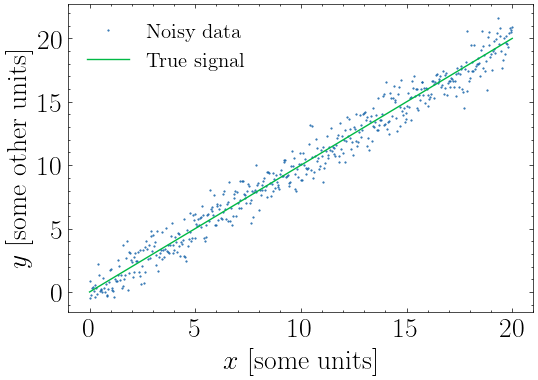

In [23]:
num_points = 500 # Number of measured data points
x = np.linspace(0, 20, num_points)
epsilon = np.random.normal(loc = 0, scale = 1, size = (num_points,))
y = x + epsilon

fig, axs = plt.subplots(1, 1, figsize = (6, 4))

ax = axs
ax.plot(x, y, ".", markersize = 1, label = "Noisy data")
ax.plot(x, x, label = "True signal")
ax.set(xlabel = r"$x$ [some units]", ylabel = r"$y$ [some other units]")
plt.legend()

We have o